## Code to make Fig S2
Elena Savidge
<br>
3 Aug 2023

In [22]:
# import rasterio
# from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy
#import rioxarray as rxr
import xarray as xr
import cmocean
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import pyproj
from pyproj import Proj, transform, CRS
# import rasterio as rio
# from rasterio.plot import show
from glob import glob
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon
import geopandas as gpd
import scipy
from scipy import ndimage
from cartopy.geodesic import Geodesic
import datetime

In [23]:
# NOTE: need dir to be set up this way for pyproj to work
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/sealenv/share/proj') 

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [24]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

## Read in data

In [40]:
#ther_pixel = pd.read_pickle('thermal_area_effectivepixel.pkl') # don't need thermal for this fig b/c not in intervals of interest
vis_pixel = pd.read_pickle('visible_area_effectivepixel_fixed_v2')  #doesnt matter if save .pkl or not

In [41]:
# partition by same time intervals as panels a,b,c in fig. 3
df2003_2004 = vis_pixel[(vis_pixel['Date']>='2003-6-1') & (vis_pixel['Date']<'2004-6-1')]
df2004_2005 = vis_pixel[(vis_pixel['Date']>='2004-6-1') & (vis_pixel['Date']<'2005-6-1')]
df2005_2006 = vis_pixel[(vis_pixel['Date']>='2005-6-1') & (vis_pixel['Date']<'2006-6-1')]

# sensitivity panels

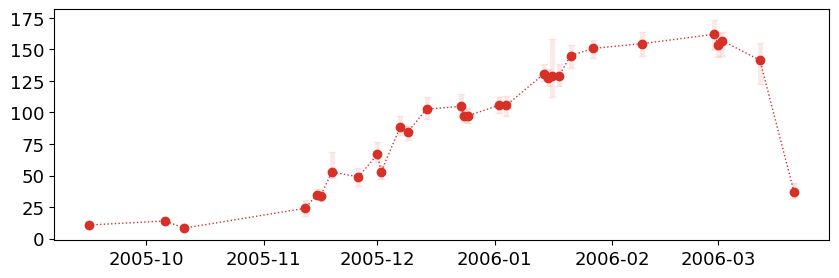

In [42]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

plt.figure(figsize=(10,3))
plt.plot(df2005_2006['Date'],df2005_2006['total'], 'o:',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.errorbar(df2005_2006['Date'],df2005_2006['total'],yerr=(df2005_2006['total']-df2005_2006['ltotal'],df2005_2006['utotal']-df2005_2006['total']),fmt="o",capsize=3,elinewidth=3.5,alpha=0.1,color = '#d73027')

#plt.legend(fontsize=10,loc='best')
plt.yticks(fontsize=13);plt.xticks(fontsize=13)
#plt.xticks(rotation=45, ha='right',fontsize=12)
#plt.ylim([-1,10])
#plt.gca().invert_xaxis()
#plt.savefig('int0506_sensitivity2.png', format='png', dpi=400)

#plt.show()

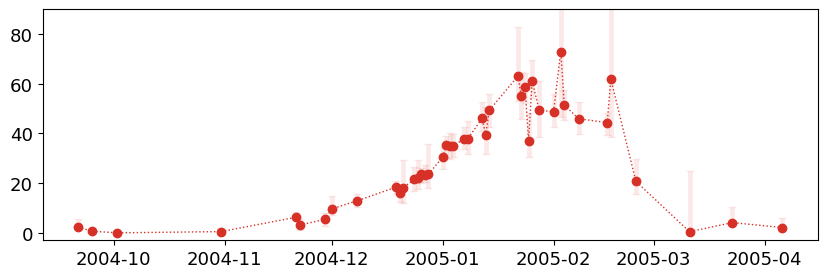

In [32]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

plt.figure(figsize=(10,3))
plt.plot(df2004_2005['Date'],df2004_2005['total'], 'o:',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.errorbar(df2004_2005['Date'],df2004_2005['total'],yerr=(df2004_2005['total']-df2004_2005['ltotal'],df2004_2005['utotal']-df2004_2005['total']),fmt="o",capsize=3,elinewidth=3.5,alpha=0.1,color = '#d73027')

#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
#plt.legend(fontsize=10,loc='best')
plt.yticks(fontsize=13);plt.xticks(fontsize=13)
#plt.xticks(rotation=45, ha='right',fontsize=12)
plt.ylim([-3,90])
#plt.gca().invert_xaxis()
plt.savefig('int0405_sensitivity2.png', format='png', dpi=400)
#plt.show()

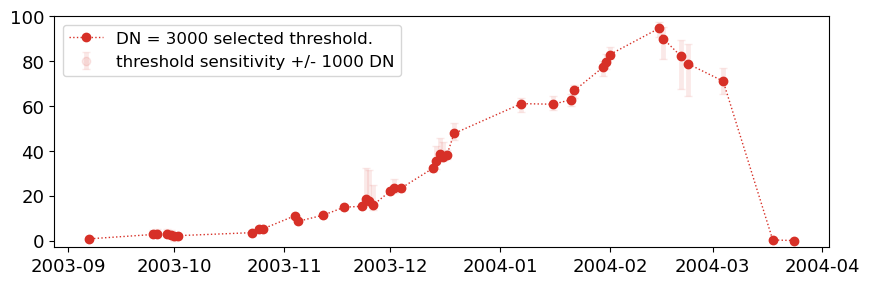

In [33]:
# will need to save compiled df as pickle file after happy w algorithm so that don't need to rerun (so long)

# Example fig

plt.figure(figsize=(10,3))
plt.plot(df2003_2004['Date'],df2003_2004['total'], 'o:',label='DN = 3000 selected threshold.',c='#d73027',linewidth= 1, markersize = 6)
plt.errorbar(df2003_2004['Date'],df2003_2004['total'],yerr=(df2003_2004['total']-df2003_2004['ltotal'],df2003_2004['utotal']-df2003_2004['total']),fmt="o",capsize=3,elinewidth=3.5,alpha=0.1,color = '#d73027',label = 'threshold sensitivity +/- 1000 DN')
             
plt.legend(fontsize=12,loc='best')
plt.yticks(fontsize=13);plt.xticks(fontsize=13)
#plt.xticks(rotation=45, ha='right',fontsize=12)
plt.ylim([-3,100])
#plt.gca().invert_xaxis()
plt.savefig('int0304_sensitivity2.png', format='png', dpi=400)

#plt.show()

## Check stats based on DN thresh differences

In [37]:
vis_pixel['utotal'].mean(),vis_pixel['total'].mean(),vis_pixel['ltotal'].mean()

(43.54161451296951, 34.88379829814709, 30.023694623016425)

In [36]:
vis_pixel['utotal'].mean()-vis_pixel['total'].mean(),vis_pixel['total'].mean()-vis_pixel['ltotal'].mean()

(8.657816214822418, 4.8601036751306665)

In [39]:
# ex case where clouds make DN thresh differences affect area
vis_pixel[vis_pixel['Date']=='2005-02-17']

,index,west,east,mid,other,total,uwest,ueast,umid,uother,utotal,lwest,least,lmid,lother,ltotal,pixelwidth,pixelheight,Date,time_diff
142,0,23.310864,7.125207,10.379932,21.111726,61.927729,27.093381,8.884518,11.611449,75.298488,122.887836,19.616312,6.069621,9.676208,3.166759,38.528899,0.359014,0.24502,2005-02-17,-7 days


# Plot fig where large sensitivity bar 

### 2005/02/17

In [12]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20050217/MYD09.A2005048.2120.006.2015099213644.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

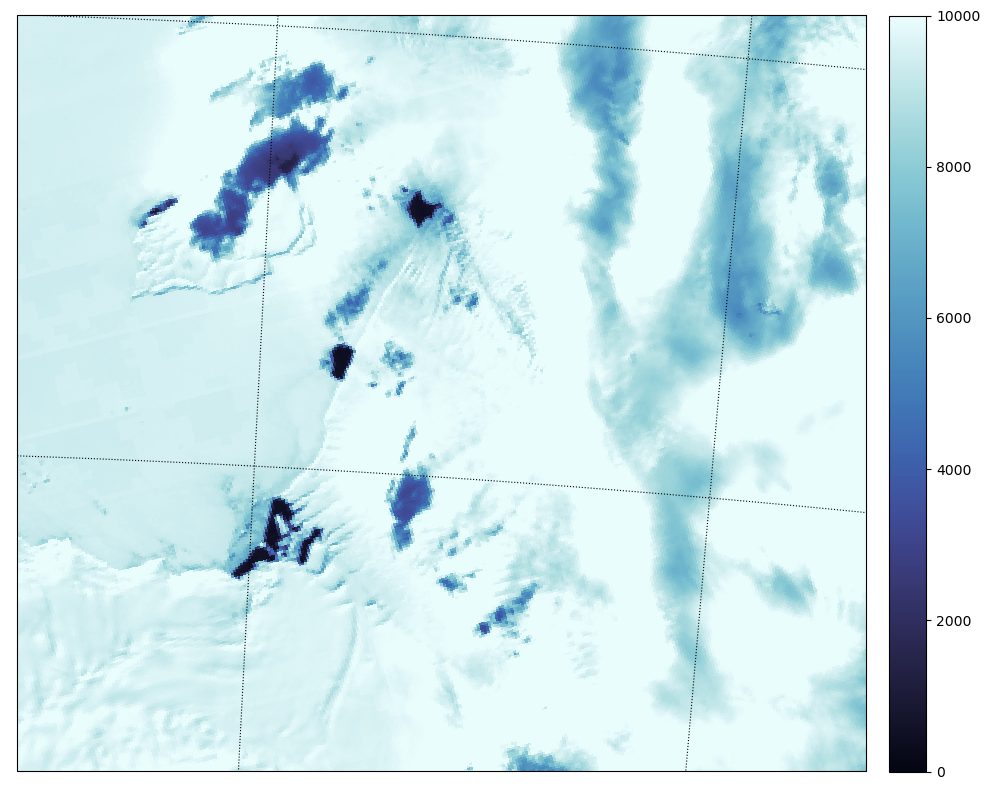

In [14]:
llcrnrlat=-75.3;urcrnrlat=-74.5;llcrnrlon=-103;urcrnrlon=-99.5 # PIG same as seal

fig,ax = plt.subplots(figsize=(10,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
#m.add_geometries(land['geometry'], crs=ccrs.PlateCarree(),facecolor='None', edgecolor='k')
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
#gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels = False


data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)

cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='vertical')#,shrink=0.84)

plt.tight_layout()

#plt.savefig('sensitivity20050217_original.jpg', format='jpg', dpi=400)


#### Function 1: extracts modis lat, lon, DN and subsets fig (with constrained coordinate bounds) into store xarray
function 1 (that is used to produce time series)

In [15]:
def modis_to_xarray(longitude,latitude,bandvals):
    
    '''Extracts modis lat, lon, B1 and subsets figure into xarray'''
    
    # Convert input data from pandas dataframe to xarray dataArray for easier use and less memory intensive
    data_xr = xr.DataArray(bandvals,dims=["y","x"], coords={"latitude": (["y", "x"],latitude), "longitude": (["y", "x"],longitude)})
    
    # Subset entire modis image to PIG bounds and store output for area calc fct
    figure_bounds = data_xr.where((data_xr.longitude>-102.7)&(data_xr.longitude<-100) & (data_xr.latitude>-75.3)&(data_xr.latitude<-74.55),drop=True)

    #return data_xr
    return figure_bounds

In [17]:
# call fct on above scene
figure_bounds = modis_to_xarray(lon250,lat250,B1) 

In [18]:
# DN 4000
dn4000 =figure_bounds.where(figure_bounds<=4000, figure_bounds==0)
dn4000 =dn4000.where(dn4000>4000, dn4000==0)
#dn4000 = dn4000 - dn3000 -dn2000
#dn4000.plot()

# DN 3000
dn3000 =figure_bounds.where(figure_bounds<=3000, figure_bounds==0)
dn3000 =dn3000.where(dn3000>3000, dn3000==0)
#dn3000 = dn3000-dn2000
#dn3000.plot()

# DN 2000
dn2000 =figure_bounds.where(figure_bounds<=2000, figure_bounds==0)
dn2000 =dn2000.where(dn2000>2000, dn2000==0)
#dn3000.plot()

In [19]:
import matplotlib.colors
cmap3 = matplotlib.colors.ListedColormap(['blue', 'white'])

#### have all DN masks on one to help see differences 
plot all three cases and overlay to see difference while adjusting transparency -- I did this part in ppt

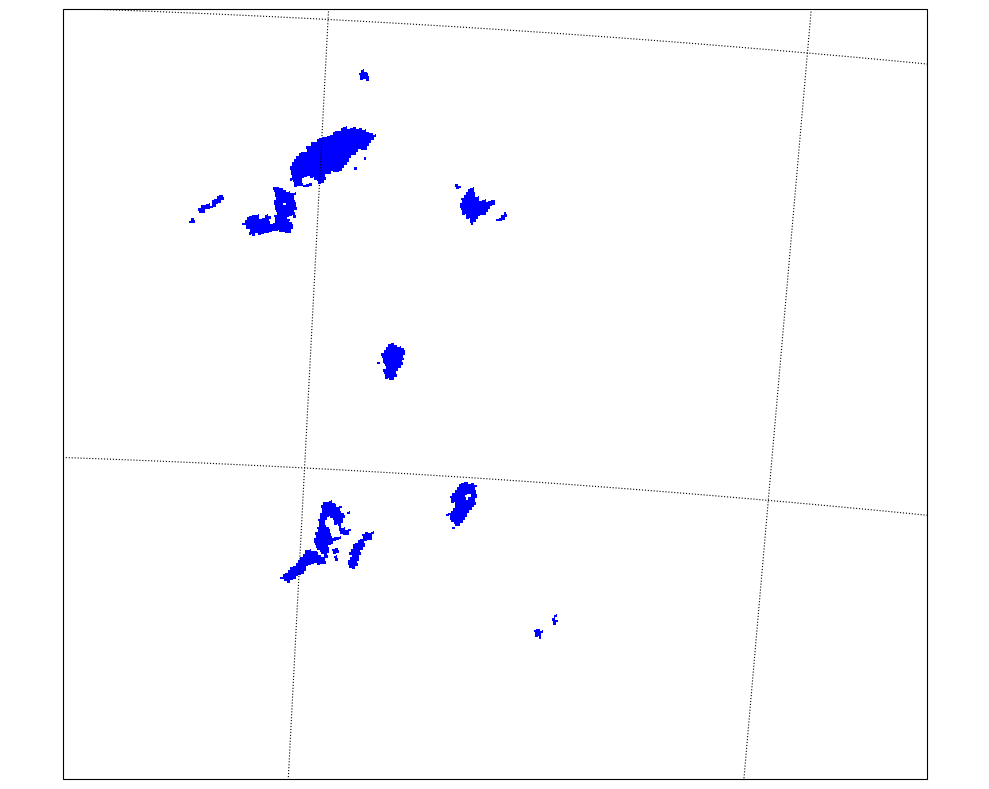

In [21]:
llcrnrlat=-75.3;urcrnrlat=-74.5;llcrnrlon=-103;urcrnrlon=-99.5 # PIG same as seal

fig,ax = plt.subplots(figsize=(10,8)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
#m.add_geometries(land['geometry'], crs=ccrs.PlateCarree(),facecolor='None', edgecolor='k')
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
#gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels = False

data = m.pcolormesh(dn4000.longitude,dn4000.latitude,dn4000.values,transform=ccrs.PlateCarree(),cmap=cmap3)
#data1 = m.pcolormesh(dn3000.longitude,dn3000.latitude,dn3000.values,transform=ccrs.PlateCarree(),cmap=cmap3)
#data2 = m.pcolormesh(dn2000.longitude,dn2000.latitude,dn2000.values,transform=ccrs.PlateCarree(),cmap=cmap3)
#data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=4000)
#data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=3000)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)

plt.tight_layout()

#plt.savefig('dn4000transp.jpg', format='jpg', dpi=400)


## Save panels and make fig in ppt

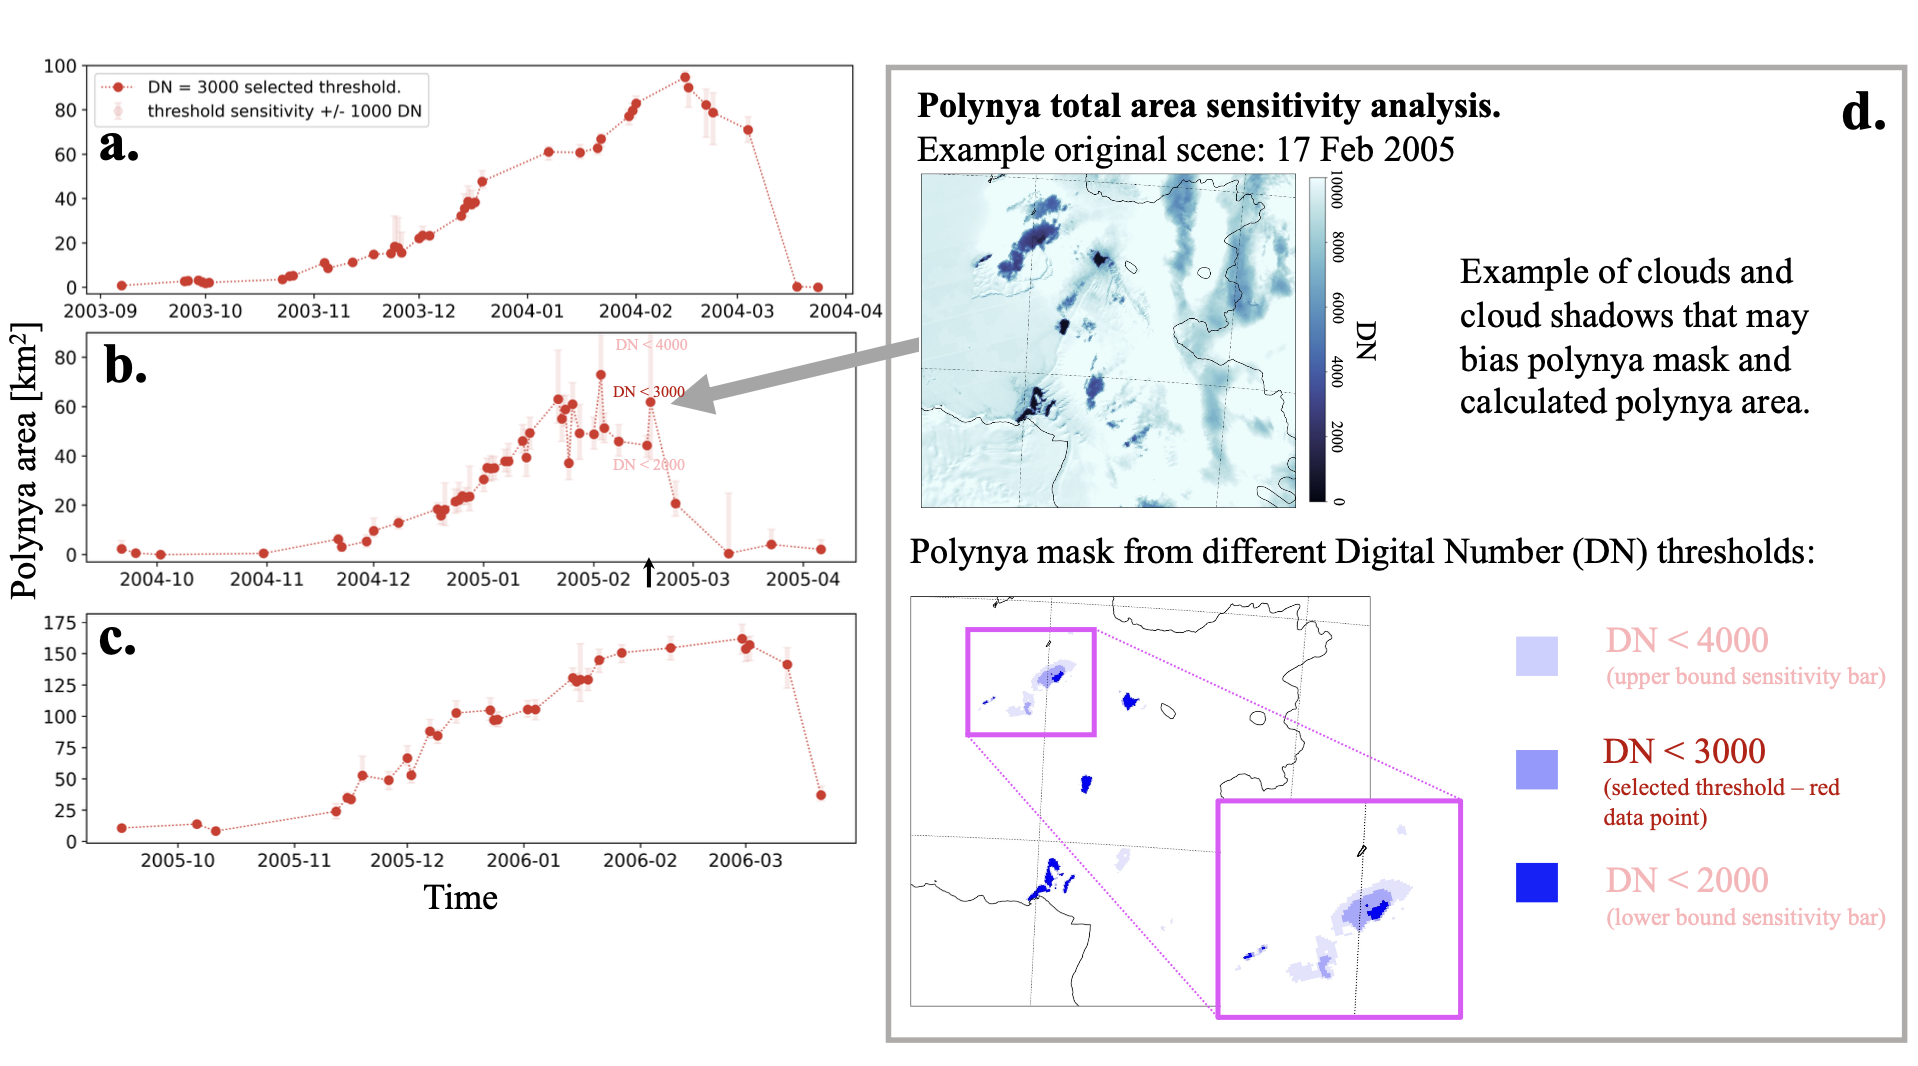